# Cleaning data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

music_df = pd.read_csv('spotify_songs_dataset.csv')

In [3]:
music_df.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='str')

<Figure size 1200x600 with 0 Axes>

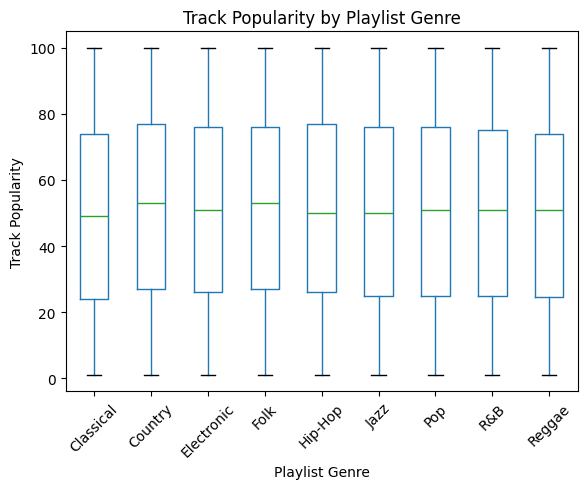

In [26]:
plt.figure(figsize=(12,6))

music_df.boxplot(
    column='popularity',
    by='genre',
    grid=False
)

plt.title('Track Popularity by Playlist Genre')
plt.suptitle('')   # removes automatic pandas title
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)

plt.show()

In [35]:
music_dummies = pd.get_dummies(music_df['genre'],drop_first=True)
print(music_dummies.head())

music_dummies = pd.concat([music_df,music_dummies],axis=1)
music_dummies = music_dummies.drop('genre',axis=1)

print(music_dummies.info())

   Country  Electronic   Folk  Hip-Hop   Jazz    Pop    R&B  Reggae
0    False        True  False    False  False  False  False   False
1    False        True  False    False  False  False  False   False
2    False       False  False    False  False   True  False   False
3    False       False  False     True  False  False  False   False
4    False       False  False    False  False   True  False   False
<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  str    
 1   song_title        50000 non-null  str    
 2   artist            50000 non-null  str    
 3   album             50000 non-null  str    
 4   release_date      50000 non-null  str    
 5   duration          45000 non-null  float64
 6   popularity        50000 non-null  int64  
 7   stream            50000 non-null  int64  
 8   language          4

In [ ]:
print(music_df.isna().sum().sort_values())
music_df = music_df.dropna(subset=['language','duration','collaboration'])
print(music_df.isna().sum().sort_values())

In [41]:
drop_cols = [
    'song_id',
    'song_title',
    'artist',
    'album',
    'release_date',
    'language',
    'explicit_content',
    'composer',
    'producer',
    'collaboration',
    'label',
    'stream'
]

music_clean = music_dummies.drop(columns=drop_cols)

In [ ]:
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



music_clean = music_clean.dropna()

print("Rows after dropna:", music_clean.shape[0])

feature = music_clean.drop('popularity',axis=1).values
target = music_clean['popularity'].values
X_train , X_test , y_train , y_test = train_test_split(feature,target,test_size=0.2,random_state=42)


kf = KFold(n_splits=5,shuffle=True,random_state=42)
linReg = LinearRegression()
linReg_cv = cross_val_score(linReg,X_train,y_train,cv=kf,scoring="neg_mean_squared_error",error_score='raise')
print(np.sqrt(-linReg_cv))

Rows after dropna: 45000
[29.08532548 28.96704857 28.73786982 28.78088816 29.05058958]


# Imputing values

- Imputation : use subject-matter expertise to replace missing data with educated guess 
- Common to use the mean 
- Can also use mediam or another value 
- For categorical values , we typically use the most frequent value - the mode
- Must split data first to avoid data leakage

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# print(music_clean.head())

y = music_df['popularity'].values

X_cat = music_df[['genre']].values.reshape(-1,1)
X_num = music_df.drop(['genre','popularity'],axis=1)
X_num = X_num.select_dtypes(include=['int64', 'float64']).values

print(X_cat)
print(X_num)

X_train_cat , X_test_cat , y_train , y_test = train_test_split(X_cat,y,test_size=0.2,random_state=12)
X_train_num , X_test_num , y_train , y_test = train_test_split(X_num,y,test_size=0.2,random_state=12)

imp_cat = SimpleImputer(strategy='most_frequent')

print(imp_cat)
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)







[['Electronic']
 ['Electronic']
 ['Pop']
 ...
 ['Pop']
 ['Electronic']
 ['Pop']]
[[2.8200000e+02 3.5055874e+07]
 [1.2700000e+02 9.2495270e+06]
 [          nan 7.6669110e+07]
 ...
 [2.0700000e+02 7.5864558e+07]
 [2.6600000e+02 4.1817978e+07]
 [1.8800000e+02 1.9182847e+07]]
SimpleImputer(strategy='most_frequent')


# Imputers are also known as transformers

In [14]:
X_num = music_df.select_dtypes(include=['int64', 'float64'])

imp_num = SimpleImputer(strategy='mean')
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_num,X_train_cat,axis=1)
X_test = np.append(X_test_num,X_test_cat,axis=1)